## GitHub Project Link - 
https://github.com/mohansameer1983/Ensemble-Project-Term-Deposit-Solution

## Import Libraries

In [159]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system

In [160]:
bankData = pd.read_csv("bank-full.csv")
bankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [161]:
bankData.shape

(45211, 17)

In [162]:
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [163]:
bankData.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Lets convert the columns with an 'object' datatype into categorical variables

## Univariate Analysis

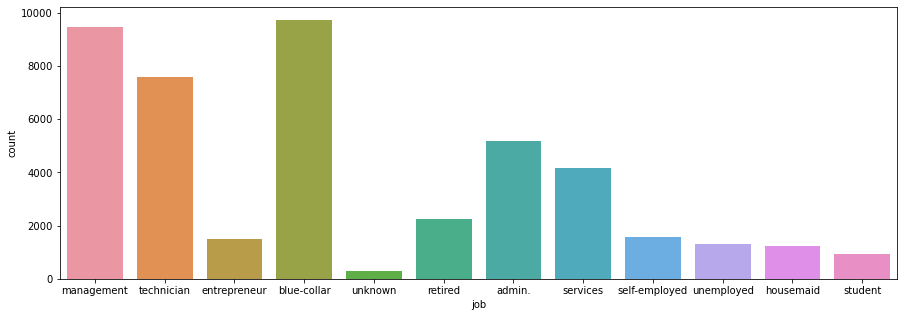

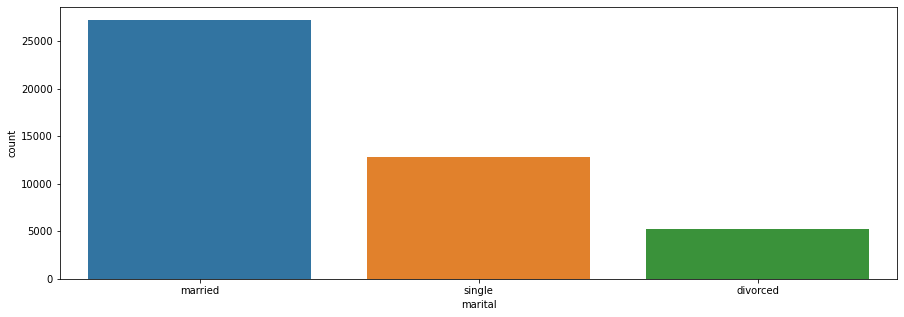

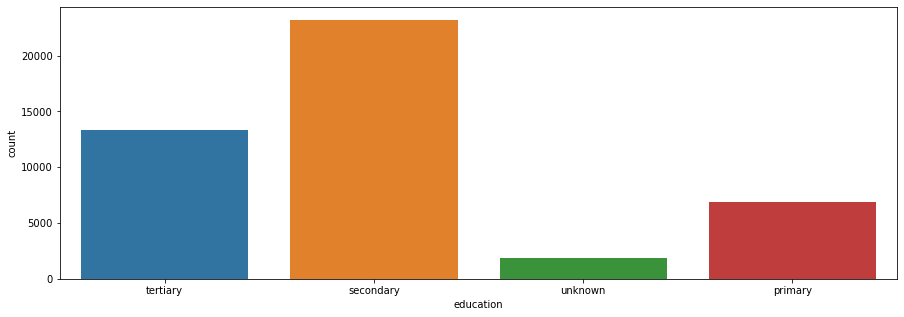

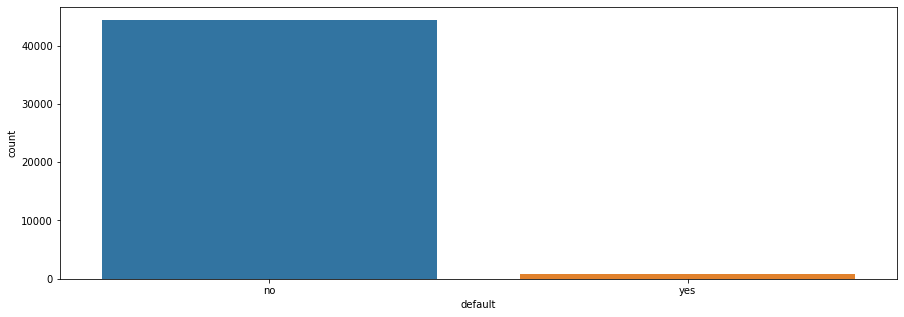

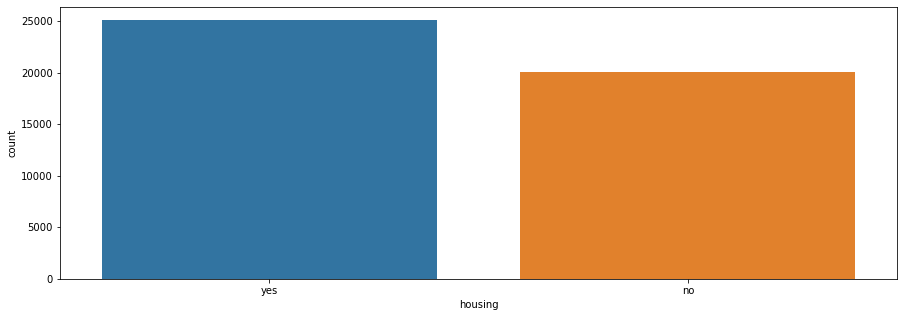

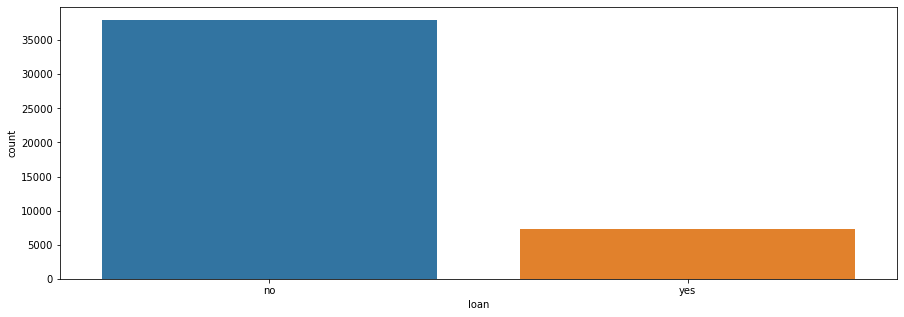

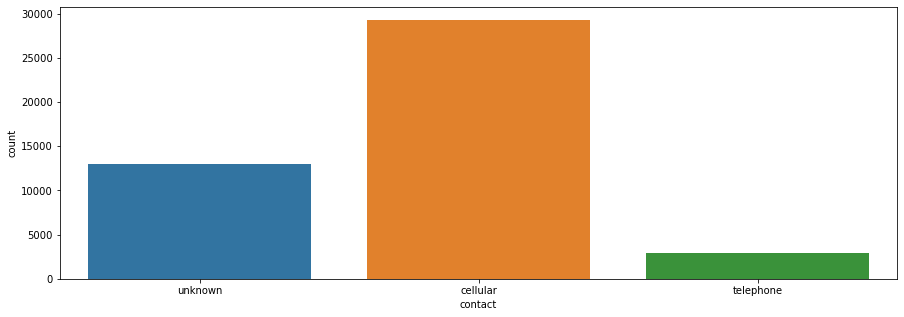

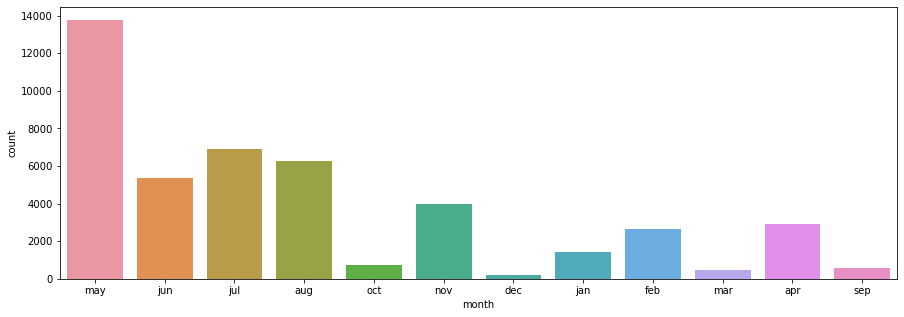

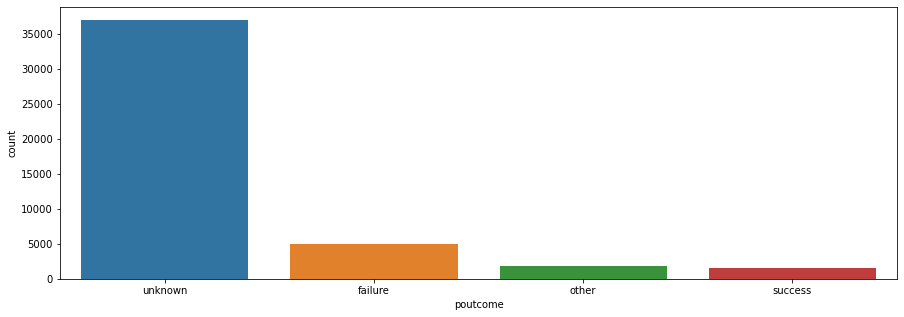

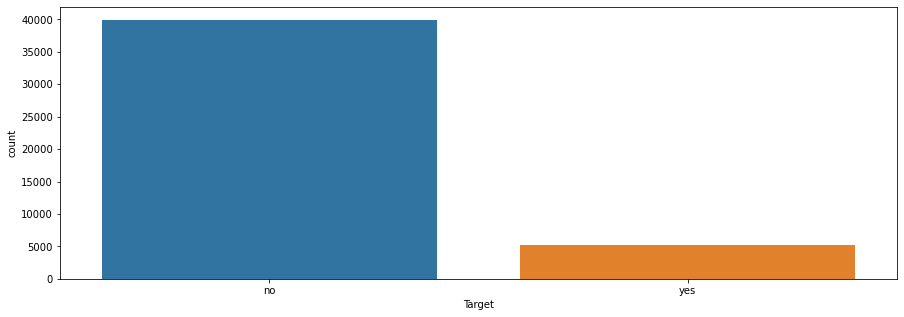

In [150]:
# Univariate Analysis
univ_bankData = bankData
columns_to_drop = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']
univ_bankData = univ_bankData.drop(columns_to_drop, axis = 1) 
for i in univ_bankData.columns:
    plt.figure(figsize=(15,5))
    sns.countplot(univ_bankData[i],)
    plt.show()

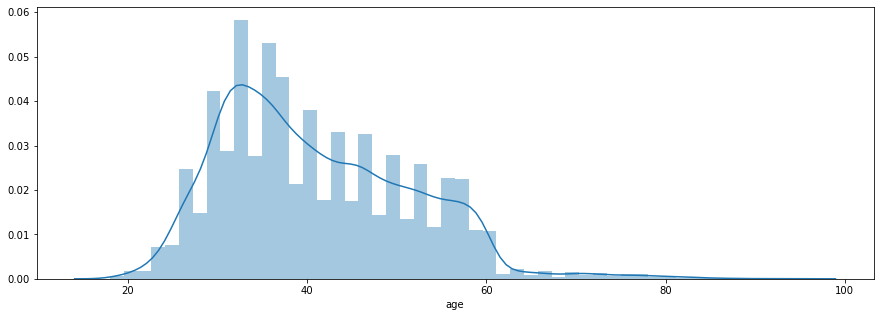

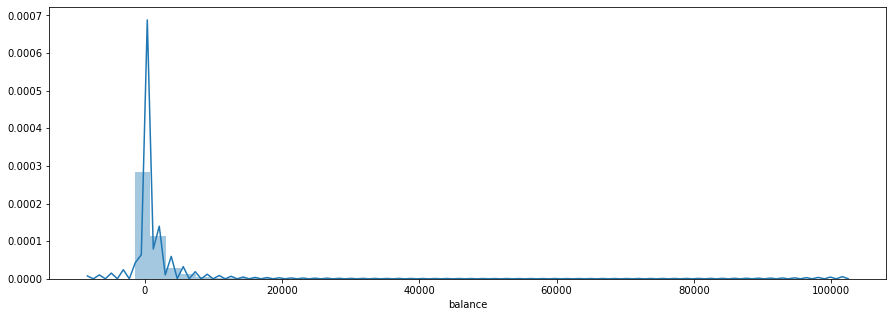

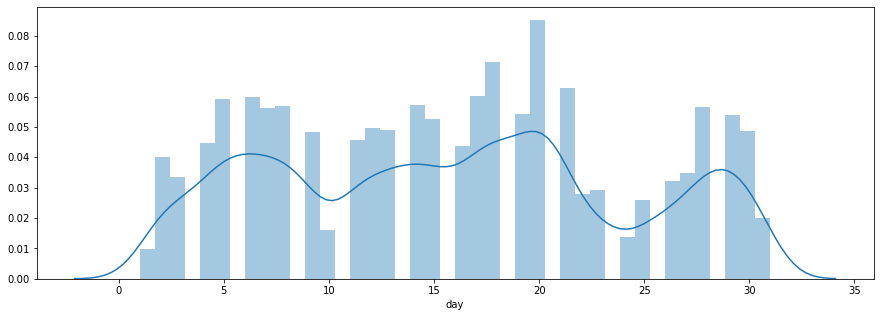

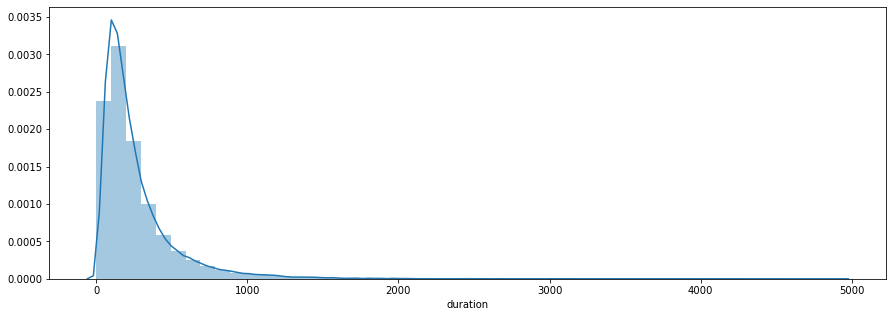

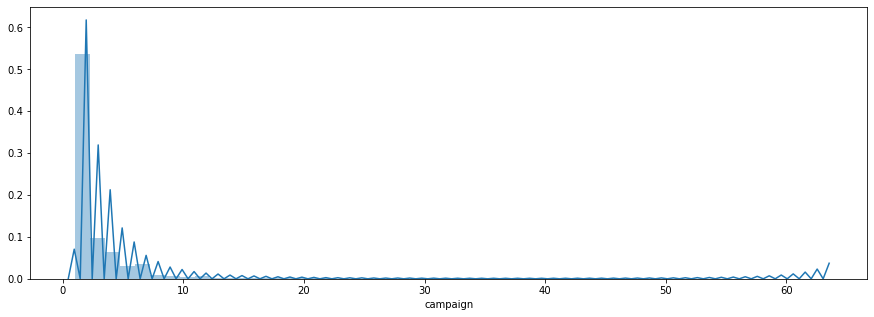

G:\MyWorkSpace\Software\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


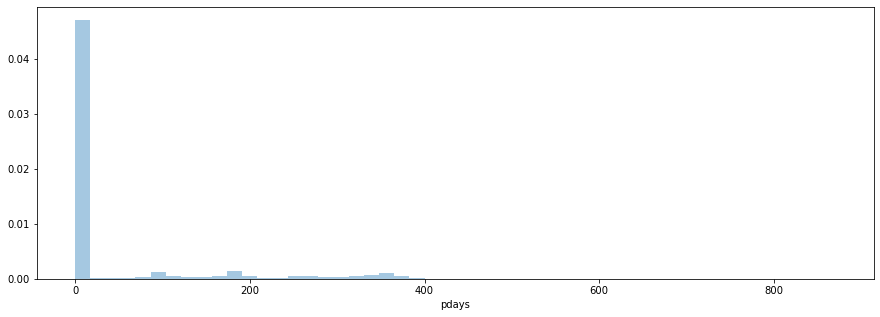

G:\MyWorkSpace\Software\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


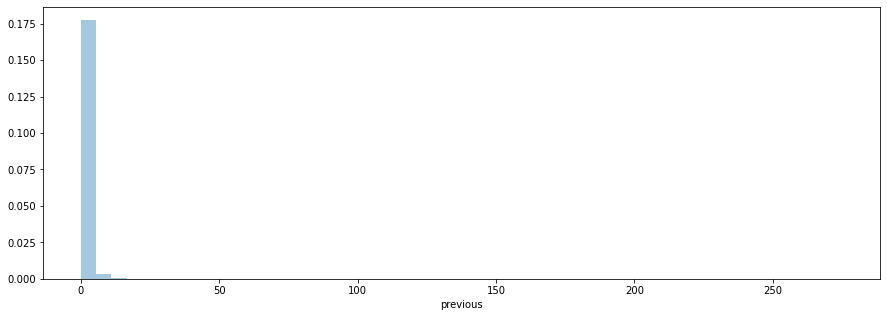

In [153]:
# Univariate Analysis Continues
univ_bankData1 = bankData
columns_to_drop1 = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome','Target']
univ_bankData1 = univ_bankData1.drop(columns_to_drop1, axis = 1) 
for i in univ_bankData1.columns:
    plt.figure(figsize=(15,5))
    sns.distplot(univ_bankData1[i])
    plt.show()

## Bi-Variate Analysis

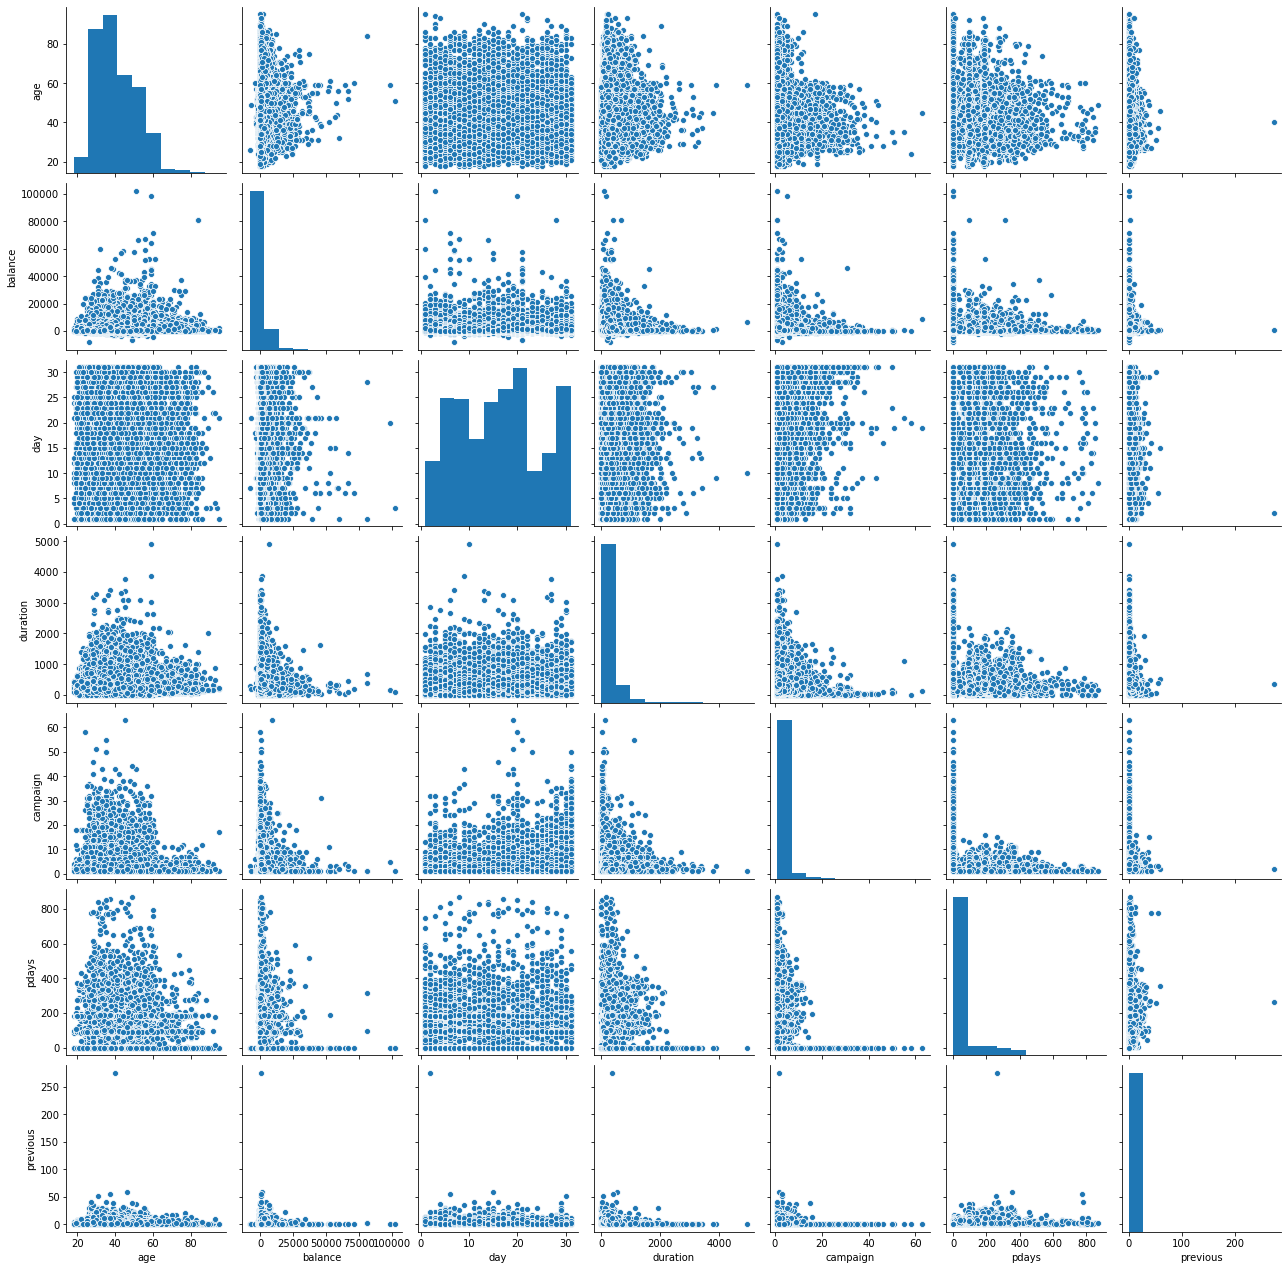

In [145]:
sns.pairplot(bankData)

In [164]:
for feature in bankData.columns: # Loop through all columns in the dataframe
    if bankData[feature].dtype == 'object': # Only apply for columns with categorical strings
        bankData[feature] = pd.Categorical(bankData[feature])# Replace strings with an integer
bankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [165]:
print(bankData.job.value_counts())
print(bankData.marital.value_counts())
print(bankData.education.value_counts())
print(bankData.default.value_counts())
print(bankData.housing.value_counts())
print(bankData.loan.value_counts())
print(bankData.contact.value_counts())
print(bankData.month.value_counts())
print(bankData.poutcome.value_counts())
print(bankData.Target.value_counts())


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [166]:
replaceStruct = {
                "education": {"primary": 1, "secondary": 2, "tertiary":3, "unknown": -1},
                "default":     {"no": 0,"yes": 1},
                "housing":     {"no": 0, "yes": 1 },
                "loan":        {"no": 0, "yes": 1 },
                "Target":        {"no": 0, "yes": 1 },
                "month":     {"jan": 1, "feb": 2 ,"mar": 3 ,"apr":4,"may":5,"jun":6,
                            "jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                "poutcome":     {"failure": 0, "success": 1, "other": 2, "unknown": -1 } 
                    }
oneHotCols=["job","marital","contact"]


In [167]:
bankData=bankData.replace(replaceStruct)
bankData=pd.get_dummies(bankData, columns=oneHotCols)
bankData.head(10)


,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,1,0,0,0,0,1,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,0,0,0,0,1,0,0,0,1
3,47,-1,0,1506,1,0,5,5,92,1,...,0,0,0,0,0,1,0,0,0,1
4,33,-1,0,1,0,0,5,5,198,1,...,0,0,0,1,0,0,1,0,0,1
5,35,3,0,231,1,0,5,5,139,1,...,0,0,0,0,0,1,0,0,0,1
6,28,3,0,447,1,1,5,5,217,1,...,0,0,0,0,0,0,1,0,0,1
7,42,3,1,2,1,0,5,5,380,1,...,0,0,0,0,1,0,0,0,0,1
8,58,1,0,121,1,0,5,5,50,1,...,0,0,0,0,0,1,0,0,0,1
9,43,2,0,593,1,0,5,5,55,1,...,0,1,0,0,0,0,1,0,0,1


In [168]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   day                45211 non-null  int64
 7   month              45211 non-null  int64
 8   duration           45211 non-null  int64
 9   campaign           45211 non-null  int64
 10  pdays              45211 non-null  int64
 11  previous           45211 non-null  int64
 12  poutcome           45211 non-null  int64
 13  Target             45211 non-null  int64
 14  job_admin.         45211 non-null  uint8
 15  job_blue-collar    45211 non-null  uint8
 16  job_entrepreneur   45211 non-null  uint8
 17  job_housemai

In [169]:
##Identify duplicates records in the data
dupes = bankData.duplicated()
sum(dupes)

0

In [170]:
## Check missing values
bankData.isnull().values.any()   # Any of the values in the dataframe is a missing value

False

In [171]:
bankData.tail()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
45206,51,3,0,825,0,0,17,11,977,3,...,0,1,0,0,0,1,0,1,0,0
45207,71,1,0,1729,0,0,17,11,456,2,...,0,0,0,0,1,0,0,1,0,0
45208,72,2,0,5715,0,0,17,11,1127,5,...,0,0,0,0,0,1,0,1,0,0
45209,57,2,0,668,0,0,17,11,508,4,...,0,0,0,0,0,1,0,0,1,0
45210,37,2,0,2971,0,0,17,11,361,2,...,0,0,0,0,0,1,0,1,0,0


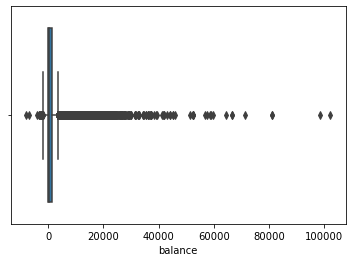

In [172]:
# Balance - Mean/Median values comparison with Max value shows outliers present this column
sns.boxplot(x=bankData['balance'])   # box plot

**Note:** Above plot shows multiple outliers as there are not included in the box of other observation i.e no where near the quartiles.

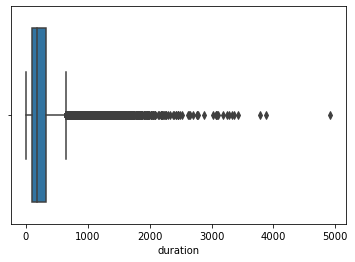

In [173]:
# Duration - Mean/Median values comparison with Max value shows outliers present this column
sns.boxplot(x=bankData['duration'])   # box plot

**Note** Above boxplot shows 2-3 outliers.

In [174]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(bankData))
z

array([[1.60696496, 1.08614757, 0.13548989, ..., 1.35602988, 0.26209091,
        1.57239532],
       [0.28852927, 0.02153577, 0.13548989, ..., 1.35602988, 0.26209091,
        1.57239532],
       [0.74738448, 0.02153577, 0.13548989, ..., 1.35602988, 0.26209091,
        1.57239532],
       ...,
       [2.92540065, 0.02153577, 0.13548989, ..., 0.73744688, 0.26209091,
        0.63597238],
       [1.51279098, 0.02153577, 0.13548989, ..., 1.35602988, 3.81547001,
        0.63597238],
       [0.37068857, 0.02153577, 0.13548989, ..., 0.73744688, 0.26209091,
        0.63597238]])

In [175]:
threshold = 5
np.where(z > threshold)

(array([    2,     4,     7, ..., 45200, 45203, 45210], dtype=int64),
 array([16, 25,  2, ...,  8, 22, 16], dtype=int64))

**Note:** The first array contains the list of row numbers and second array respective column numbers, which mean z[2][16] have a Z-score higher than 3.

In [176]:
print(z[2][16])

5.422561153987016


### OutLiers
In this dataset, for balance/duration/campaign we can see many outliers. But, if we replace them with median/mode values, it could have negative impact on our accuracy of model. So, leaving them as is.

## Split Data

In [177]:
# Get data model ready, where 'Personal Loan' column is target variable.
y = bankData['Target']
X = bankData.drop(['Target'], axis=1)
X

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,1,0,0,0,0,1,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,0,0,0,0,1,0,0,0,1
3,47,-1,0,1506,1,0,5,5,92,1,...,0,0,0,0,0,1,0,0,0,1
4,33,-1,0,1,0,0,5,5,198,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,17,11,977,3,...,0,1,0,0,0,1,0,1,0,0
45207,71,1,0,1729,0,0,17,11,456,2,...,0,0,0,0,1,0,0,1,0,0
45208,72,2,0,5715,0,0,17,11,1127,5,...,0,0,0,0,0,1,0,1,0,0
45209,57,2,0,668,0,0,17,11,508,4,...,0,0,0,0,0,1,0,0,1,0


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Logical Regression

In [179]:
# Fit a model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg = LogisticRegression(random_state=7,solver='lbfgs', max_iter=3000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=7)

In [214]:
# Publish metrics evaluating model performance
y_predicted = log_reg.predict(X_test)
print("LR - Test Data Accuracy:",metrics.accuracy_score(y_test, y_predicted))
acc_LR=metrics.accuracy_score(y_test, y_predicted)
print("LR - Train Data Accuracy:",log_reg.score(X_train, y_train))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))
print("f1_Score:",metrics.f1_score(y_test, y_predicted))
logit_roc_auc = metrics.roc_auc_score(y_test, y_predicted)
print("roc_auc_score:",logit_roc_auc)

LR - Test Data Accuracy: 0.8903715718077263
LR - Train Data Accuracy: 0.8913641103422125
Precision: 0.553156146179402
Recall: 0.21470019342359767
f1_Score: 0.30933581049698095
roc_auc_score: 0.5961538925995871


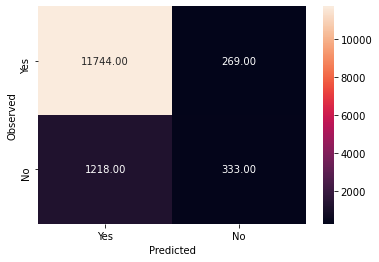

In [191]:
# Draw heatmap to display confusion matrix
cm = metrics.confusion_matrix( y_test, y_predicted)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [222]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logical Regression'], 'accuracy': acc_LR})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logical Regression,0.890372


## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [212]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth=3)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

## Scoring our Decision Tree

In [215]:
print("DT - Train Data Accuracy:",dTree.score(X_train, y_train))
acc_DT = dTree.score(X_test, y_test)
print("DT - Test Data Accuracy:",acc_DT)



DT - Train Data Accuracy: 0.8949979460928366
DT - Test Data Accuracy: 0.8969330580949573


In [218]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                        Imp
age                0.052318
education          0.000000
default            0.000000
balance            0.000000
housing            0.000000
loan               0.000000
day                0.000000
month              0.000000
duration           0.592041
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.320769
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000
marital_divorced   0.000000
marital_married    0.000000
marital_single     0.000000
contact_cellular   0.006156
contact_telephone  0.000000
contact_unknown    0.028715


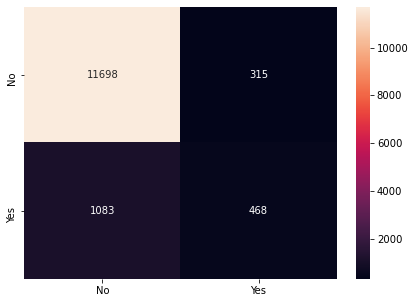

In [220]:
y_predict = dTree.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [223]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [acc_DT]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logical Regression,0.890372
0,Decision Tree,0.896933


<a id  = ensemblelearning></a>
#                             Ensemble Technique - Bagging

In [224]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


Bagging - Train Accuracy: 0.8970518532562328
Bagging - Test Accuracy: 0.8994396933058095


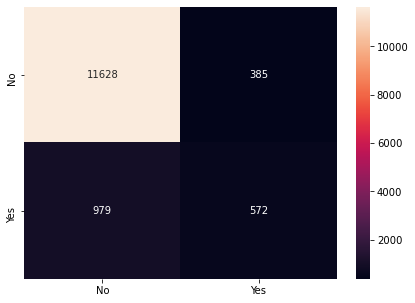

In [225]:

y_predict = bgcl.predict(X_test)
print("Bagging - Train Accuracy:",bgcl.score(X_train , y_train))
acc_BG = bgcl.score(X_test , y_test)
print("Bagging - Test Accuracy:",acc_BG)

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [226]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logical Regression,0.890372
0,Decision Tree,0.896933
0,Bagging,0.899440


# Ensemble Technique - AdaBoosting

In [196]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


Ada Boosting - Train Accuracy: 0.89904256327614
Ada Boosting - Test Accuracy: 0.8998820406959599


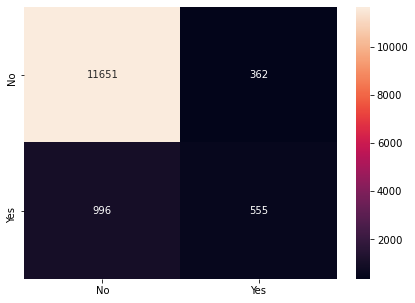

In [227]:
y_predict = abcl.predict(X_test)
print("Ada Boosting - Train Accuracy:",abcl.score(X_train , y_train))
acc_AB = abcl.score(X_test , y_test)
print("Ada Boosting - Test Accuracy:",acc_AB)

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [228]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logical Regression,0.890372
0,Decision Tree,0.896933
0,Bagging,0.899440
0,Ada Boosting,0.899882


#                     Ensemble Technique - GradientBoost

In [198]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


Gradient Boosting - Train Accuracy: 0.9056782633424969
Gradient Boosting - Test Accuracy: 0.9023886759068122


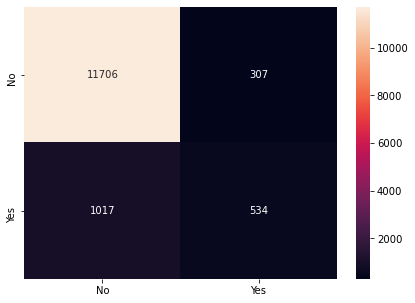

In [229]:
y_predict = gbcl.predict(X_test)
print("Gradient Boosting - Train Accuracy:",gbcl.score(X_train , y_train))
acc_GB = gbcl.score(X_test , y_test)
print("Gradient Boosting - Test Accuracy:",acc_GB)
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [230]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logical Regression,0.890372
0,Decision Tree,0.896933
0,Bagging,0.899440
0,Ada Boosting,0.899882
0,Gradient Boosting,0.902389


# Ensemble RandomForest Classifier

In [236]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(X_train, y_train)


RF - Train Accuracy: 0.9998104085695326
RF - Test Accuracy: 0.9057800058979653


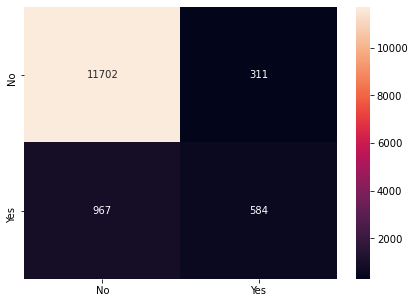

In [237]:
y_predict = rfcl.predict(X_test)
print("RF - Train Accuracy:",rfcl.score(X_train , y_train))
acc_RF = rfcl.score(X_test , y_test)
print("RF - Test Accuracy:",acc_RF)
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [238]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logical Regression,0.890372
0,Decision Tree,0.896933
0,Bagging,0.899440
0,Ada Boosting,0.899882
0,Gradient Boosting,0.902389
0,Random Forest,0.905780


## Conclusion
From above list looks like Gradient Boosting and Random Forest Algorithm are best for this case study.